<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 28 April 2024, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **28 April 2024, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [288]:
# Isi dengan data diri Anda
NAMA = "Sri Saraswati Widhisari"
KELAS = "B"
NPM = "2206812810"
USERNAME_KAGGLE = "posty_melek"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [289]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sri Saraswati Widhisari dari kelas B dengan NPM 2206812810, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sri Saraswati Widhisari)


## Intro to Linear Models for Regression

### Linear Regression

Linear regression adalah salah satu metode supervised learning yang bekerja dengan mencari nilai parameter yang paling cocok untuk suatu persamaan linear, yaitu parameter yang menghasilkan error paling minimal. Linear regression menggunakan asumsi bahwa input mempunyai hubungan yang linear dengan target, sehingga model ini akan membuat persamaan garis lurus sebagai fungsi hipotesis.<br>

Contoh persamaan linear

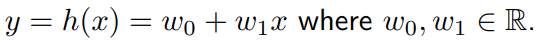

Persamaan di atas adalah fungsi yang memetakan $x$ ke $y$ (dimana $y = h(x)$), dengan:
- $w_0$ adalah _intercept_, titik potong, atau bias
- $w_1$ adalah koefisien
- $x$ adalah nilai independen (input variable)
- $y$ adalah nilai dependen (target variable)

Perhatikan bahwa persamaan tersebut hanya menerima 1 fitur ($x$).

Apabila jumlah fitur pada dataset >1, persamaan bisa digeneralisasikan menjadi sebagai berikut.

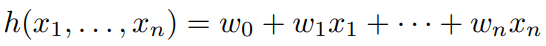

atau

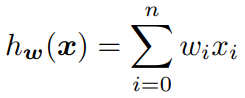

Nilai-nilai parameter seperti $w_0, w_1, w_2, w_n$, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimalkan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression, yang biasa disebut _sum-of-square error function_.

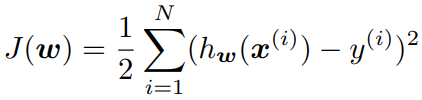

Proses peminimalan nilai loss akan menggunakan algoritma Gradient Descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn menyediakan modul LinearRegression yang siap dipakai untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = -3+2x`. Nilai -3 dan 2, secara berurutan dapat dianggap sebagai nilai $w_0$ dan $w_1$.

In [290]:
import numpy as np

# Membuat data buatan

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
Y = -3 + 2 * X

# menambahkan beberapa noises pada data
noise = np.array([0.2, -0.1, 0.3, -0.2, 0.1, -0.3, 0.1, -0.2, 0.2, -0.1])
X_train  = X.reshape(-1,1)
#-1 itu dari numpy mau nentuin  -> based dari elemen yang ada 
# 1 itu adalah jumlah kolom yang kita inginkan 
y_train = Y + noise #noise ditambahin di y_train 

print('X: ', X_train)
print('y: ', y_train)

X:  [[2]
 [3]
 [2]
 [4]
 [5]
 [2]
 [1]
 [5]
 [5]
 [1]]
y:  [ 1.2  2.9  1.3  4.8  7.1  0.7 -0.9  6.8  7.2 -1.1]


In [291]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train) #difit ke lienar regression 

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [292]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)
#dapatnya berarti w0 atau interceptnya jadi -2.9 (harusnya 3) sedangkan koedieiwn pertama atau w1 jadi 1.9  (harusnya 2)

Koefisien persamaan linear: 
 [1.99166667]
Intersep persamaan linear: 
 -2.975000000000002


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

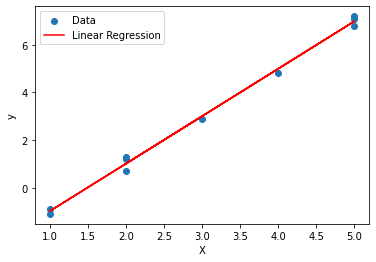

In [293]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
#dari persamaan itu -> akan dibuat prediciton linear dari X_train  -> ini nanti dibawhanya baru predict X_test
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [294]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2], [4], [7]])
y_test = np.array([1, 5, 11])

y_predict = linear.predict(X_test)

print(y_predict)

[ 1.00833333  4.99166667 10.96666667]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [295]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))
#r-squared makin mendekati 1 semakin bagus

R-squared: 0.9999753289473684


Dari hasil di atas, dapat diketahui bahwa 99% variasi pada y dapat dijelaskan oleh x pada model regresi. Atau dengan kata lain, perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance karena model yang dihasilkan bersifat linear. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, salah satu teknik yang bisa digunakan adalah regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan pengaruh bobot pada model dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

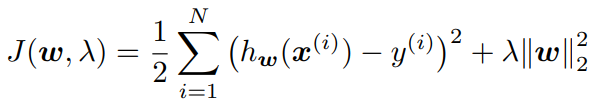

- Lasso Regression

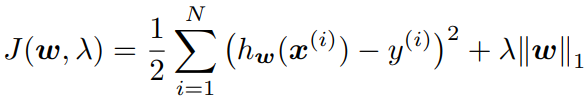

Fungsi loss pada model regularisasi ini hampir sama dengan linear regression biasa, hanya saja ditambahkan term regularisasi di akhir.

Term tambahan pada fungsi loss tersebut berperan seperti bobot penalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

Parameter λ akan menentukan seberapa besar dampak regularisasi pada model yang terbentuk.
- Semakin besar nilai λ menunjukan pengaruh regularization term yang besar pada bobot dan berdampak pada nilai bobot mengecil sehingga dapat mencegah overfitting
- Semakin kecil nilai λ menunjukan pengaruh regularisasi yang kecil

Ketika nilai λ=0, algoritma yang dilatih sama dengan linear regression biasa tanpa adanya regularisasi.


**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset buatan sebelumnya.

In [296]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [297]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)     

Koefisien persamaan regresi ridge: 
 [1.83846154]
Intersep persamaan regresi ridge: 
 -2.5153846153846158


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

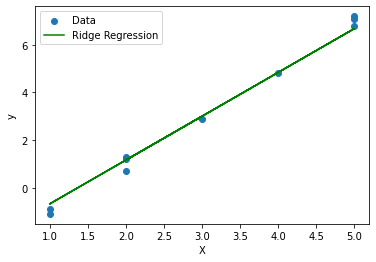

In [298]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [299]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [300]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.15833333]
Intersep persamaan regresi lasso: 
 -0.4750000000000001


Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

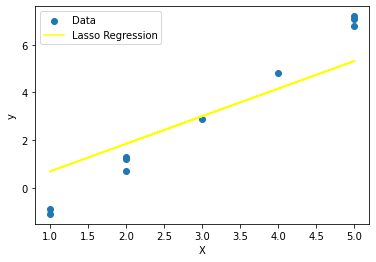

In [301]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaiki kinerja dari model pada konteks data sederhana yang kita bentuk dan cenderung underfit.

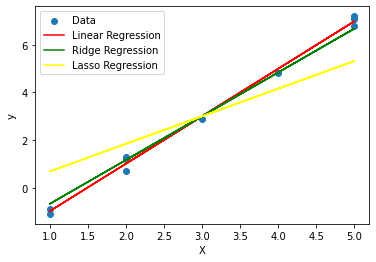

In [302]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data asuransi kesehatan pada sekitar 1300 pengguna asuransi di Amerika Serikat. Dataset ini akan digunakan untuk memprediksi premi asuransi tahunan (jumlah yang dibayarkan setiap bulan) yang ditawarkan kepada pelanggan.

- **Age:** Umur pelanggan (18 — 64)

- **Sex:** Jenis kelamin pelanggan (male, female)

- **BMI:** Body Mass Index, salah satu indikator kesehatan (16 — 53.1)

- **Children:** Jumlah anak yang dimiliki (0 — 5)

- **Smoker:** Indikator pelanggan merokok atau tidak (yes, no)

- **Region:** Area tempat tinggal pelanggan (southwest, southeast, northwest, northeast)

- **Charges:** besaran premi asuransi pelanggan, sebagai target variable (1.12k — 63.8k)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/harshsingh2209/medical-insurance-payout

In [303]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [304]:
# Menampilkan informasi keseluruhan terkait dataset
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:
- Handle missing values dan duplikat data
- Melakukan encoding pada data kategorikal
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
- Melakukan standarisasi pada dataset. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

In [305]:
#handle missing values
df_insurance.isnull().sum()
#itidak ada misisng value 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [306]:
#handle duplikat data 
df_insurance.duplicated().sum()
#duplikat ada satu 
duplikat = df_insurance[df_insurance.duplicated(keep=False)]
print("Baris yang duplikat:")
print(duplikat)


Baris yang duplikat:
     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631
581   19  male  30.59         0     no  northwest  1639.5631


In [307]:
#drop duplikat secara permanen
df_insurance.drop_duplicates(inplace=True)


In [308]:
df_insurance.duplicated().sum()

0

In [309]:
df_insurance.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [310]:
#melakukan encoding pada data kategorikal
#sex smoker
df_insurance_encoded = pd.get_dummies(df_insurance, columns=['sex', 'smoker'], drop_first=True)


# One-hot encoding untuk 'region'
df_insurance_encoded = pd.get_dummies(df_insurance_encoded, columns=['region'])

In [311]:
#Bagi data training jadi 80% dan 20%
from sklearn.model_selection import train_test_split
X = df_insurance_encoded.drop('charges', axis=1)
y = df_insurance_encoded['charges']
#charges nya yang target valuenya 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [312]:
#setelah ini dilakuan standarisasi-> 1) pertama harus dipisah dulu training dan test agar tidak ada kebocoran pola, 2. fit di traiing baru dapat model scaler
#model scaler ini nanti akan buat transform di test, tetapi jangan di dit lagi di test -> ini tetap buat memastikan 
#bahwa ini tidak bocor datanya 
from sklearn.preprocessing import StandardScaler

# standarisasi pada data training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#  transform di data test 
X_test_scaled = scaler.transform(X_test)



In [313]:
X_train_scaled

array([[-1.1576804 , -0.99692768, -0.90790804, ..., -0.57266946,
        -0.60581158, -0.57410974],
       [-1.30061876, -0.79276204,  0.7669042 , ..., -0.57266946,
        -0.60581158, -0.57410974],
       [ 0.91492586,  1.15466402,  0.7669042 , ...,  1.74620801,
        -0.60581158, -0.57410974],
       ...,
       [-1.37208794, -1.4118716 , -0.07050192, ..., -0.57266946,
        -0.60581158,  1.74182728],
       [-0.08564268, -0.41997378,  1.60431032, ..., -0.57266946,
        -0.60581158,  1.74182728],
       [-0.30005022,  0.87941237,  0.7669042 , ..., -0.57266946,
         1.65067825, -0.57410974]])

In [314]:
X_test_scaled

array([[ 0.70051832, -1.3267337 , -0.90790804, ..., -0.57266946,
        -0.60581158, -0.57410974],
       [-0.72886531, -0.8167329 ,  2.44171645, ..., -0.57266946,
        -0.60581158,  1.74182728],
       [ 0.84345668,  0.96620343,  1.60431032, ...,  1.74620801,
        -0.60581158, -0.57410974],
       ...,
       [-1.22914958,  0.6678075 ,  0.7669042 , ..., -0.57266946,
        -0.60581158, -0.57410974],
       [ 1.5581485 ,  0.95215155, -0.07050192, ..., -0.57266946,
        -0.60581158,  1.74182728],
       [ 0.55757996, -1.02833777, -0.90790804, ..., -0.57266946,
        -0.60581158, -0.57410974]])

#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `charges` sebagai target prediksi. Tampilkan hasil prediksi pada keseluruhan data uji.

In [315]:
from sklearn.linear_model import LinearRegression

#objek linear regression 
model = LinearRegression()

# latih model linear dengan data train dan y_train
model.fit(X_train_scaled, y_train)

# prediksi X_test_scaled
y_pred = model.predict(X_test_scaled)

# tampilkan hasil prediksi pada data uji 
print("Hasil Y Prediksi pada Data Uji:")
for i, pred in enumerate(y_pred):
    print(f"Data baris ke- {i+1}: Y Prediksi: {pred}, Y Aktual: {y_test.iloc[i]}")



Hasil Y Prediksi pada Data Uji:
Data baris ke- 1: Y Prediksi: 7958.722028943404, Y Aktual: 8688.85885
Data baris ke- 2: Y Prediksi: 5798.722028943404, Y Aktual: 5708.867
Data baris ke- 3: Y Prediksi: 14518.722028943404, Y Aktual: 11436.73815
Data baris ke- 4: Y Prediksi: 32102.722028943404, Y Aktual: 38746.3551
Data baris ke- 5: Y Prediksi: 9030.722028943404, Y Aktual: 4463.2051
Data baris ke- 6: Y Prediksi: 13222.722028943404, Y Aktual: 9304.7019
Data baris ke- 7: Y Prediksi: 30198.722028943404, Y Aktual: 38511.6283
Data baris ke- 8: Y Prediksi: 1382.7220289434044, Y Aktual: 2150.469
Data baris ke- 9: Y Prediksi: 10470.722028943404, Y Aktual: 7345.7266
Data baris ke- 10: Y Prediksi: 11606.722028943404, Y Aktual: 10264.4421
Data baris ke- 11: Y Prediksi: 10374.722028943404, Y Aktual: 13415.0381
Data baris ke- 12: Y Prediksi: 33382.722028943404, Y Aktual: 24393.6224
Data baris ke- 13: Y Prediksi: 30998.722028943404, Y Aktual: 37607.5277
Data baris ke- 14: Y Prediksi: 17510.722028943404,

b) Tampilkan metrik evaluasi MAE, MSE, RMSE, dan R-squared untuk hasil prediksi yang sudah dibuat.



In [316]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Hitung MAE
mae = mean_absolute_error(y_test, y_pred)
# HITUNG MSE
mse = mean_squared_error(y_test, y_pred)
# HITUNG RMSE
rmse = np.sqrt(mse)
# HIutng r_squared 
r_squared = r2_score(y_test, y_pred)

# hasil prediks dengan aktual y 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r_squared}")


Mean Absolute Error (MAE): 4183.402678512604
Mean Squared Error (MSE): 35472234.09352716
Root Mean Squared Error (RMSE): 5955.857125009562
R-squared: 0.8069601986816971


c) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Berikan insight yang anda dapat dari visualisasi tersebut.

Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

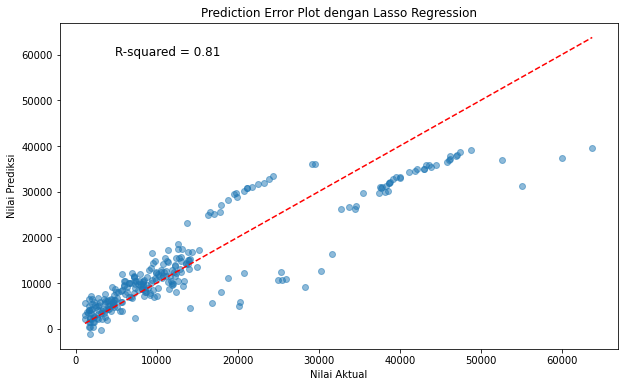

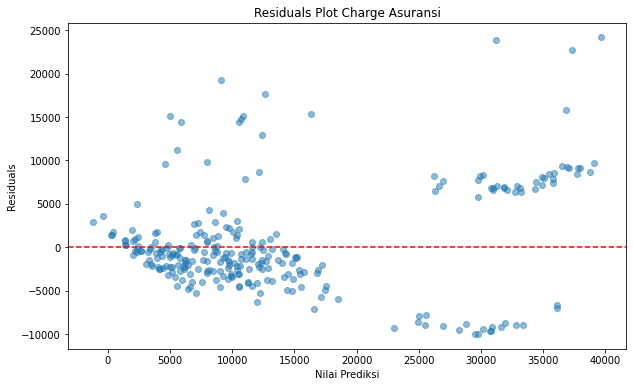

In [317]:
import matplotlib.pyplot as plt

# untuk plot residual dan predicitn error plot maka kita hitung terlebih dahulu residualnya dengan perbandingan y_test dan y_pred
residuals = y_test - y_pred

# # Prediction Error Plot
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, residuals, alpha=0.5)
# plt.title('Prediction Error Plot')
# plt.xlabel('Nilai Aktual')
# plt.ylabel('Residuals')
# plt.axhline(y=0, color='r', linestyle='--')
# plt.show()

r_squared = r2_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Garis diagonal

plt.text(0.1, 0.9, f'R-squared = {r_squared:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.title('Prediction Error Plot dengan Lasso Regression')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()




# Residuals Plot
plt.figure(figsize=(10, 6))
plt.title('Residuals Plot Charge Asuransi')
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Dari grafik prediction error, kita bisa melihat bahwa garis linear hasil dari fungsi prediksi (nilai prediksi) perbedaan antara keduanya bisa dilihat bahwa untuk dta points dengan rentang di bawah 20000 masih memiliki jarak yang tidak terlalu jauh dengan nilai aktualnya. Ini bisa dilihat di grafik residual bahwa selisih antara y_Pred dan y_actual berada di dominasi ada rentang 5000 sampai -5000, dengan data point biru yang berada di bawah garis merah di grafik residual menjelaskan model cenderung mengover estimate nilai nilai data points ini. Ini bisa berupa adanya outliers yang tidak dipertimbnagkan denagan baik oleh model atau ada bisa saja pola non linier dalam daya yang tidak bisa ditambahkan oleh model linear ini. Sedangkan data point di atas garis residual terjadi karena model memprediksi data point tersebut terlalu rendah dibandingkan dengan nilai aktualnya. Model cenderung underestimate niali nilai ini. Ini bisa terjadi karena ada kemungkinan pengabaian fitur penting hingga kekurangan fleksibilitas model untuk menangkap pola yang lebih kompleks.

d) Lakukan **cross validation** pada data latih dan tampilkan nilai R-squared setiap iterasi dan rata-ratanya untuk mendapatkan besaran kinerja sebenarnya dari model.

> Catatan: Jumlah split dibebaskan.

In [318]:
from sklearn.model_selection import cross_val_score

# cross validation dengan model regresi linear
cv_scores = cross_val_score(model, X_train_scaled, y_train,  cv=5, scoring='r2')

# tampilkan r-squared setiap iterasi 
print("Nilai R-squared setiap iterasi cross validation:")
for i, iteration_score in enumerate(cv_scores):
    print(f"Iterasi ke-{i+1}: {iteration_score}")

# rata rata dari nilai r-squared untuk semua iterasi 
mean_cv_score = cv_scores.mean()
print(f"Rata-rata nilai R-squared dari semua iterasi : {mean_cv_score}\n")


Nilai R-squared setiap iterasi cross validation:
Iterasi ke-1: 0.6893409387578316
Iterasi ke-2: 0.7635359643395776
Iterasi ke-3: 0.7211398361167115
Iterasi ke-4: 0.704413424881209
Iterasi ke-5: 0.7444619102065284
Rata-rata nilai R-squared dari semua iterasi : 0.7245784148603717



#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [319]:
alphas = [0.02, 0.2, 2, 20, 200]

b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [320]:
from sklearn.linear_model import Lasso

#keep lasso models dulu di list 
lasso_models = []
#loop based dari banyaknya nilai alpha di alphas 
for alpha in alphas:
    #assign ke parameternya
    lasso_model = Lasso(alpha=alpha)
    #fit ke model
    lasso_model.fit(X_train_scaled, y_train)
    #dan simpen di listnya 
    lasso_models.append(lasso_model)


c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [321]:
print("Hasil evaluasi untuk tiap model Lasso Regression:")
list_r2_urutan_alphas = []
for i in range(len(lasso_models)):
    lasso_model = lasso_models[i]
    alpha = alphas[i]
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred_lasso)
    mse = mean_squared_error(y_test, y_pred_lasso)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, y_pred_lasso)
    list_r2_urutan_alphas.append(r_squared)
    print(f"Alpha = {alpha} -> MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r_squared}")


Hasil evaluasi untuk tiap model Lasso Regression:
Alpha = 0.02 -> MAE: 4177.049650622504, MSE: 35478160.86464062, RMSE: 5956.354662429078, R-squared: 0.8069279452094409
Alpha = 0.2 -> MAE: 4177.086376198499, MSE: 35479417.18803164, RMSE: 5956.460122256477, R-squared: 0.8069211083009689
Alpha = 2 -> MAE: 4177.463606079796, MSE: 35492819.79230955, RMSE: 5957.585063791331, R-squared: 0.8068481713649943
Alpha = 20 -> MAE: 4181.237395276159, MSE: 35633688.117851876, RMSE: 5969.395959211608, R-squared: 0.8060815663210877
Alpha = 200 -> MAE: 4220.319451272406, MSE: 36978225.45840575, RMSE: 6080.972410594029, R-squared: 0.7987645977760217


d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [322]:
list_r2_urutan_alphas
max_list = max(list_r2_urutan_alphas)
max_list

0.8069279452094409

In [323]:
list_r2_urutan_alphas
#metrik nilai R-squared tertinggi adalah yang model dengan alpha 0.02
#0.8069279452094409

[0.8069279452094409,
 0.8069211083009689,
 0.8068481713649943,
 0.8060815663210877,
 0.7987645977760217]

In [324]:
#tampung r
r_squared_values = []
for lasso_model in lasso_models:
    r_squared_values.append(lasso_model.score(X_test_scaled, y_test))
# Mendapatkan indeks model terbaik berdasarkan nilai R-squared tertinggi
best_model_index = np.argmax(r_squared_values)#ambil index dari lasso modelnya 
best_lasso_model = lasso_models[best_model_index]
best_alpha = alphas[best_model_index]
print(f"Model terbaik adalah model Lasso Regression dengan nilai alpha = {best_alpha}")


Model terbaik adalah model Lasso Regression dengan nilai alpha = 0.02


e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [325]:
y_pred_best_lasso = best_lasso_model.predict(X_test_scaled)
print("Hasil prediski model lasso di semua data uji:\n")
print(y_pred_best_lasso)

# print(len(y_pred_best_lasso))
# print(len(y_test))


Hasil prediski model lasso di semua data uji:

[ 8.14373836e+03  5.73711375e+03  1.43691970e+04  3.17454108e+04
  8.96242790e+03  1.31497479e+04  3.04466297e+04  1.45335975e+03
  1.06330278e+04  1.13189102e+04  1.03778402e+04  3.31183888e+04
  3.10771870e+04  1.74118616e+04  1.08015859e+04  9.52894143e+03
  4.16110192e+03  3.17315402e+04  3.21947474e+03  5.22997757e+03
  3.54985182e+03  3.02837300e+04  1.48989061e+04  3.04569119e+04
  3.11076546e+04  5.51190358e+03  3.55029513e+04  3.65704543e+04
  1.14122583e+04  1.42056245e+04  6.50231857e+03  1.27247357e+04
  3.99947070e+02  1.20884447e+04  3.96591017e+04  1.23395321e+04
  4.74410312e+03  3.91901333e+03  3.08607445e+04  8.95874805e+03
  7.05384191e+03  3.01124880e+04  3.47803945e+04  1.22916009e+04
  7.35737203e+03  3.42066264e+03  6.21238441e+03  8.98345896e+03
  4.26400394e+03  9.01998930e+03  6.60151920e+03  1.20801954e+04
  3.12446835e+04  3.55352593e+03  1.10470598e+04  9.73518770e+03
  1.08383435e+04  2.42943207e+03  3.1162194

f)  Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

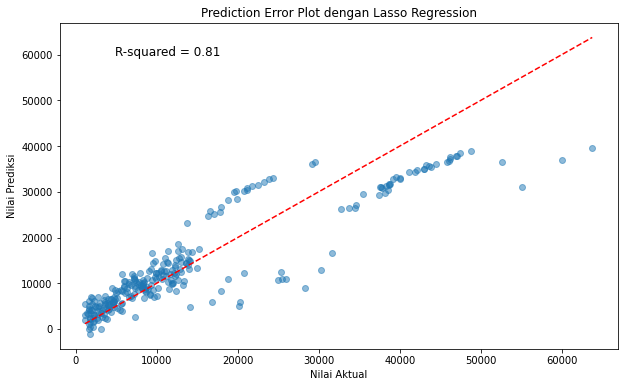

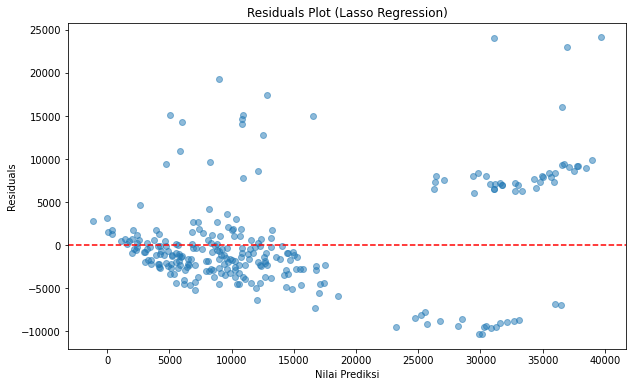

In [326]:
# Prediction Error Plot

r_squared = r2_score(y_test, y_pred_best_lasso)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_lasso, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Garis diagonal

plt.text(0.1, 0.9, f'R-squared = {r_squared:.2f}', fontsize=12, transform=plt.gca().transAxes)
plt.title('Prediction Error Plot dengan Lasso Regression')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()

# Residuals Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_lasso, y_test - y_pred_best_lasso, alpha=0.5)
plt.title('Residuals Plot (Lasso Regression)')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Nilai alpha digunakan untuk mengontrol penalti yang akan diberikan kepada koefisien yang tidak signifikan. Hal ini untuk mencegah adanya overfitting, dengan menekan koefisien menjadi nol. Semakin besar nilai alpha, maka semakin banyak koefisien yang akan ditekan ke nol, akibatnya model menjadi lebih sederhana (sparse). Kita bisa melihat dari soal sebelumnya, bahwa perubahan nilai alpha mempengaruhi nilai dari matrik R-squared. Apabila nilai alpha terlalu besar, model bisa menjadi terlalu sederhana dan tidak bisa menangkap  kompleksitas penting dalam data, yang berujung pada penurunan kinerja. Semakin kecil alphanya, maka lebih banyak koefisien yang akan signiika, sehingga lebih banak fitur yang berkontribusi dalam memprediksi variabel target, dan ini dapat membuat model menjadi lebih kompleks.



`JAWABAN`

#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [327]:
alphas = [0.02, 0.2, 2, 20, 200]

b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [328]:
from sklearn.linear_model import Ridge

#tampung model based alphas di list 
ridge_models = []
#loop
for alpha in alphas:
    #pkaia list_alphanya 
    ridge_model = Ridge(alpha=alpha)
    #fit ke train yangs udah scle d
    ridge_model.fit(X_train_scaled, y_train)
    #terus append
    ridge_models.append(ridge_model)

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [329]:
print("Hasil prediksi model Ridge Regression based metrik :")
for i in range(len(ridge_models)):
    ridge_model = ridge_models[i]
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred_ridge)
    mse = mean_squared_error(y_test, y_pred_ridge)
    r_2 = r2_score(y_test, y_pred_ridge)
    rmse = np.sqrt(mse)

    print(f"Nilai Alpha = {alphas[i]} -> MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r_2}")



Hasil prediksi model Ridge Regression based metrik :
Nilai Alpha = 0.02 -> MAE: 4177.096868750231, MSE: 35478700.116499275, RMSE: 5956.399929193747, R-squared: 0.8069250106022949
Nilai Alpha = 0.2 -> MAE: 4177.558546320902, MSE: 35484817.75921343, RMSE: 5956.9134423133455, R-squared: 0.8068917184073077
Nilai Alpha = 2 -> MAE: 4182.166246331559, MSE: 35546257.36169779, RMSE: 5962.068211761569, R-squared: 0.8065573642579359
Nilai Alpha = 20 -> MAE: 4228.659003820883, MSE: 36185725.16272854, RMSE: 6015.4571865094795, R-squared: 0.8030773822264982
Nilai Alpha = 200 -> MAE: 4732.484887694681, MSE: 44155292.31106242, RMSE: 6644.944868925732, R-squared: 0.7597070195126375


d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [330]:
r_squared_values = [ridge_model.score(X_test_scaled, y_test) for ridge_model in ridge_models]
best_model_index = np.argmax(r_squared_values)
ridge_model_dipilih = ridge_models[best_model_index]
best_alpha = alphas[best_model_index]
print(f"Model yang dipilih dengan nilai alpha = {best_alpha}")
#bisa pakai list biasa jgk sih kayak nomor diatas 


Model yang dipilih dengan nilai alpha = 0.02


e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [331]:
y_pred_best_ridge = ridge_model_dipilih.predict(X_test_scaled)
print("Hasil prediksi dari model Ridge Regression dengan nilai alpha 0.02 pada keseluruhan data uji:")
print(y_pred_best_ridge)


Hasil prediksi dari model Ridge Regression dengan nilai alpha 0.02 pada keseluruhan data uji:
[ 8.14379588e+03  5.73725183e+03  1.43692619e+04  3.17451510e+04
  8.96251867e+03  1.31497752e+04  3.04464059e+04  1.45348022e+03
  1.06330837e+04  1.13189821e+04  1.03778636e+04  3.31180322e+04
  3.10769103e+04  1.74118042e+04  1.08017021e+04  9.52897855e+03
  4.16121001e+03  3.17312214e+04  3.21958989e+03  5.23009537e+03
  3.54998444e+03  3.02834494e+04  1.48989384e+04  3.04565740e+04
  3.11073661e+04  5.51207076e+03  3.55026272e+04  3.65700207e+04
  1.14123264e+04  1.42057064e+04  6.50243979e+03  1.27247489e+04
  4.00101724e+02  1.20884222e+04  3.96586983e+04  1.23395405e+04
  4.74428307e+03  3.91918494e+03  3.08603797e+04  8.95880728e+03
  7.05397929e+03  3.01122230e+04  3.47800716e+04  1.22916442e+04
  7.35747447e+03  3.42075862e+03  6.21253535e+03  8.98350438e+03
  4.26414889e+03  9.02006248e+03  6.60164557e+03  1.20802514e+04
  3.12443974e+04  3.55364326e+03  1.10470944e+04  9.73524590e

f)  Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

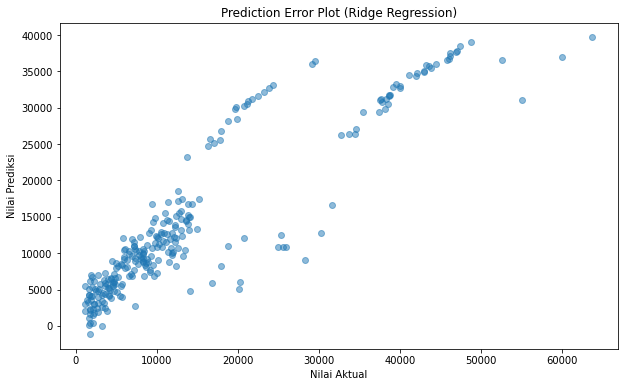

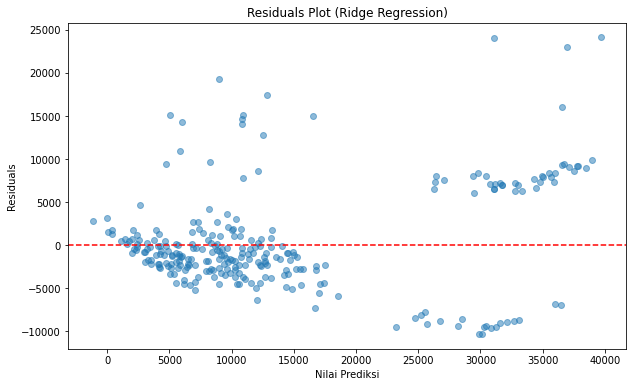

In [332]:
residual = y_test - y_pred_best_ridge #residual dulu masukkin ke prediction error plotnya 
# Prediction Error Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_ridge, alpha=0.5)
#plt.plot(y_test, residual, color='red', linestyle='--')  #residual sebagai garsi
#ini jadinya komplkes baegt residuanya
#but it turns out krn perbedaan dalam representasi visual antara dua dua jenis plot tersebut
# residua plot menunjukkna residual 9selisih antara nilai aktual dan nilai prediski terhadap nilai prediksi itu sendiri)
# dalam plot tersebut residu utnuk setiap titik data diplo tterhadpa dnilai proeduksi yang sesuai
#  Jika residu tidak menunjukkan pola yang jelas atau variasi yang signifikan terhadap nilai prediksi, plot akan terlihat lebih lurus dan teratur.
# Prediction Error Plot, di sisi lain, menunjukkan nilai aktual terhadap nilai prediksi, 
# serupa dengan scatter plot. Di sini, residu biasanya diabaikan dan tidak secara eksplisit ditampilkan. 
# Jika terdapat variasi yang kompleks atau pola yang tidak terlihat pada scatter plot, seperti pada Prediction Error Plot, itu mungkin karena ada faktor-faktor yang tidak
# dipertimbangkan dengan baik dalam model atau karena data memiliki sifat yang kompleks yang sulit ditangkap oleh model linier.
plt.title('Prediction Error Plot (Ridge Regression)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()

# Residuals Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_ridge, residual, alpha=0.5)
plt.title('Residuals Plot (Ridge Regression)')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


g) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Ini dikarenakan perbedaan norma yang digunakan antara kedua model tersebut. Pada Lasso Regression, dengan normal L1 yang mempunyai sifat sparse atau harang membuat titik optimal didapat dengan memiliki banyak koefisien yang bernilai nol.
∣w∣∣ 1 = ∑p i=1 ∣wi∣
Membuat nilai koefisien menjadi nol, ini berarti bahwa ada fitur yang tidak berkontribusi dalam memprediksi target variabel. Ini juga berarti adanya seleksi fitur dan penurunan dimensi.
Sedangkan ridge regression menggunakan norma L2 dalam regularisasinya, dan tidak bersifat sparse.
∣∣w∣∣2=∑p i=1 (wi) ^2
Model ini cenderung mempertahankan semua fitur dalam modelnya, namun bobot antara fitur dapat berbeda satu sama lain (bobot bisa diredam). Oleh karena itu ridge regression tidak bisa digunakan untuk melakukan seleksi fitur, lebih digunakan utk mengendalikan overfitting dan meningkatnya generalisasi model.

`JAWABAN`

# Intro to Linear Models for Classification

### Logistic Regression

Logistic regression adalah model linear yang hampir mirip dengan linear regression. Namun, alih-alih memprediksi nilai kontinu, logistic regression hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor, atau lebih tepatnya binary classifier. Contoh visualisasinya adalah sebagai berikut.

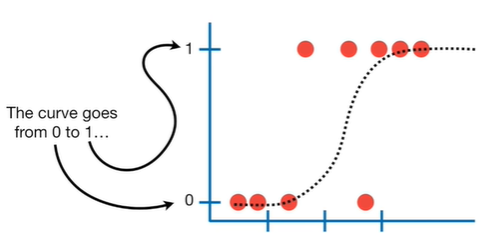

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

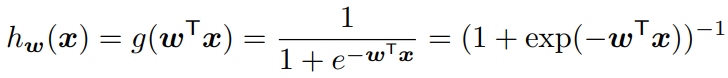

Model logistic regression memanfaatkan fungsi sigmoid $g=\frac{1}{1+e^{-z}}$ untuk mentransformasi hasil perkalian $z=w^Tx$ menjadi rentang 0-1. Output dari fungsi sigmoid mencerminkan peluang suatu data diklasifikasi sebagai kelas 1. Untuk mengubah bentuk peluang menjadi kelas, diperlukan threshold yang membatasi penentuan kelas sesuai dengan keperluan dari dataset (tidak mesti 0.5). Pemilihan threshold ini dapat dipilih menggunakan berbagai metode, salah satunya dengan ROC Curve, yang dapat Anda dalami lebih lanjut melalui slide :)

![Logistic regression threshold](https://miro.medium.com/v2/resize:fit:483/0*KZu2_AY6Oxr86dWd.png)

Sumber gambar: https://morihosseini.medium.com/mastering-logistic-regression-thresholds-b34fe07f09f5

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, tidak seperti linear regression yang meminimalkan perbedaan hasil prediksi, di sini logistic regression memaksimalkan kesamaan hasil prediksi dengan data aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa Anda pelajari sendiri dari slide :D). Berikut adalah persamaan likelihood yang ingin dimaksimalkan tersebut.

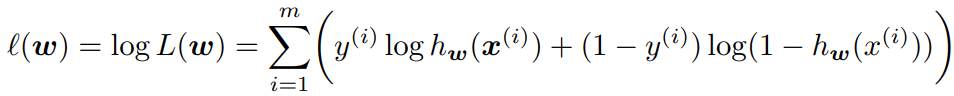

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.


In [333]:
# Membentuk data buatan
x1  = np.array([6, 9, 4, 6, 8, 4, 6, 2, 9, 2])
x2  = np.array([8, 7, 3, 5, 9, 6, 7, 5, 9, 3])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.where((x1 > 5) & (x2 > 5), 1, 0)

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[6 8]
 [9 7]
 [4 3]
 [6 5]
 [8 9]
 [4 6]
 [6 7]
 [2 5]
 [9 9]
 [2 3]]
y:  [1 1 0 0 1 0 1 0 1 0]


In [334]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [335]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[8, 5], [3, 6]])
y_test = np.array([0, 0])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[1 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [336]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
#sampai w1 krn kan ada x1 dan x2 
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[-10.12198936535299, 0.6927561778286978, 0.9828742808825577]


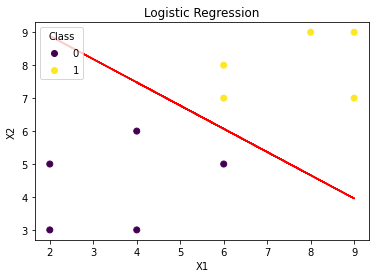

In [337]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

In [338]:
#ini ngeplot kalau diliat nilai x1 dan x2 nya sama sama punya nilai diatas 5
#maka baru masuk ke kelas 1


Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [339]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

<img src="https://images.unsplash.com/photo-1568581357391-c71a1675ef93?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="dollars" width=300/>

Dataset yang digunakan pada bagian logistic regression adalah data terkait *fake bills*. Model yang akan dibuat akan memprediksi apakah suatu invoice/bill asli atau tidak. Berikut penjelasan masing-masing kolom pada data.

- **is_genuine**: target variable yang menunjukan apakah bill asli atau tidak (true, false)

- **diagonal**: ukuran diagonal dalam mm

- **height_left**: tinggi dari sisi kiri bill dalam mm

- **height_right**: tinggi dari sisi kanan bill dalam mm

- **margin_low**: ukuran margin bawah dalam mm

- **margin_up**: ukuran margin atas dalam mm

- **length**: panjang total bill dalam mm


**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills

In [340]:
import pandas as pd

# Import dataset diabetes dan menampilkan 5 row teratas
df_bill = pd.read_csv('fake_bills.csv', delimiter=';')
df_bill.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [341]:
# Menampilkan informasi keseluruhan terkait dataset
df_bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


#### Soal 5: Logistic Regression

a) Lakukan pengecekan dan penanganan missing values serta data duplikat.

In [342]:
# cek ada berapa misisng value 
print(df_bill.isna().sum())

#di margin_low ad sebanyak 37, cek persentase, terus kalau mau input pakai distribusi apa 
print(37/ len(df_bill))
#ini kecil banget -> 0.024666666666666667


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64
0.024666666666666667


In [343]:
df_bill.margin_low.skew()
#0.8630655172248254
#condong ke kanan 
#drop aja 

0.8630655172248254

In [344]:
#df_bill.dropna(inplace= True)
#pakai penagangan diubah jadi median 
df_bill['margin_low'] = df_bill['margin_low'].fillna(df_bill['margin_low'].median())

In [345]:
# cek duplikat 
duplicate_rows = df_bill[df_bill.duplicated()]
print("Baris duplikat:\n", duplicate_rows)


# Penghapusan data duplikat
df_bill.drop_duplicates(inplace=True)
#tidak ada yang duplikat berarti 

Baris duplikat:
 Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []


b) Lakukan encoding pada data kategorikal di dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [346]:
#karena fitur semua berupa data numerik yang kontinu maka tidak perlu diencoding
#mungkin kita bisa encode is_gunine waluapun sebenarnya tidak terlalu diperlukan 
df_bill['is_genuine'] = df_bill['is_genuine'].map({True: 1, False: 0})


In [347]:
df_bill_encoded = df_bill.copy()
#kalau asli -> 1 
#kalau palsu -> 0

In [348]:
#bagi jadi train dan test 
from sklearn.model_selection import train_test_split

X = df_bill_encoded.drop(columns=['is_genuine'])
y = df_bill_encoded['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [349]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1500, dtype: int64

c) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [350]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression


model = LogisticRegression() #pakai parameter dengan max_iter =1000
#fit model logistic regression 
model.fit(X_train, y_train)
# Prediksi pada test data 
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Menampilkan hasil evaluasi metrik
print("F1 Macro Average:", f1_macro)
print("F1 Micro Average:", f1_micro)
print("Precision Macro Average:", precision_macro)
print("Precision Micro Average:", precision_micro)
print("Recall Macro Average:", recall_macro)
print("Recall Micro Average:", recall_micro)
# # tampilkan confusion matrix
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# # tampilkan  hasil evaluasi metrik
# print("Classification Report:\n", classification_report(y_test, y_pred))

F1 Macro Average: 0.9891711085175248
F1 Micro Average: 0.99
Precision Macro Average: 0.9922279792746114
Precision Micro Average: 0.99
Recall Macro Average: 0.9863636363636363
Recall Micro Average: 0.99


In [351]:
X_train

,diagonal,height_left,height_right,margin_low,margin_up,length
382,172.28,104.62,103.80,4.08,3.08,113.26
538,171.90,104.50,103.49,4.08,2.82,113.50
1493,171.63,104.33,104.61,4.88,3.35,112.16
1112,172.06,104.28,104.31,5.61,3.27,111.61
324,172.10,104.42,103.60,4.18,2.89,113.32
...,...,...,...,...,...,...
1130,171.56,104.29,104.19,5.23,3.63,112.94
1294,172.40,104.27,104.18,4.92,3.17,111.79
860,171.38,103.83,103.99,4.44,3.12,113.48
1459,171.78,104.31,103.82,6.19,3.25,111.14


d) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [352]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#yg kategorikal hanya yang y_target saja

e) Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [353]:
# inisiasi model logistic regressiond engan parameter max_iter sebanyak 1000 untuk hindair convergence warning. 
logreg = LogisticRegression(max_iter=1000) 
#fit dengan X_train yang sudah discale
logreg.fit(X_train_scaled, y_train)

# prediksi dengan model logreg dengan x_test yang sudah discaled
y_pred = logreg.predict(X_test_scaled)

# Menghitung metrik evaluasi
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Menampilkan hasil evaluasi metrik
print("F1 Macro Average:", f1_macro)
print("F1 Micro Average:", f1_micro)
print("Precision Macro Average:", precision_macro)
print("Precision Micro Average:", precision_micro)
print("Recall Macro Average:", recall_macro)
print("Recall Micro Average:", recall_micro)
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:\n", conf_matrix)
# classification_rep = classification_report(y_test, y_pred)
# print("\nClassification Report:\n", classification_rep)


F1 Macro Average: 0.9892136770574911
F1 Micro Average: 0.99
Precision Macro Average: 0.9901772419424564
Precision Micro Average: 0.99
Recall Macro Average: 0.9882775119617224
Recall Micro Average: 0.99


f) Dari kedua model yang dibangun dengan data yang dinormalisasi dan data yang tidak dinoarmalisasi, manakah yang memberikan performa terbaik? Berikan analisis Anda mengenai hal tersebut.

Catatan:
Jika saya melakukan drop data untuk penanganan nan value untuk kolom margin_low saya akan mendapatkan nilai untuk semua skor adalah 1, walaupun saya belum melakukan normalisasi.
Sedangkan jika saya mengisi nan dari margin_low dengan median maka saya akan mendapatkan skor 0.99 atau 0.98 untuk semua metrik.


Jawaban:
Alasan mengapa normalisasi dapat berpengaruh terhadap performa skor meskipun dalam case ini tidak signifikan adalah karena menghilangkan perbedaan skala antara fitur-fitur dalam dataset. Perbedaan skala yang signifikan pada fitur-fitur dapat membuat beberapa fitur dengan skala yang lebih besar pertama, dapat mendominasi perhitungan sehingga mengabaikan informasi yang terkandung pada fitur dengan skala yang lebih kecil. Kedua, karena loss function menggunakan gradient descent, skala fitur mempengaruhi juga pa kecepatan konvergensi. Fitur yang memiliki skala berbeda-beda maka permukaan dari kesalahan (kalau di kelas yang mulus lebih seperti mangkok) akan memiliki bentuk yang lebih panjang dan sempit di beberapa dimensi daripada yang lain, ini akan memperlambat konvergensi algoritma. Terakhir, perbedaan skala yang besar juga membuat model tidak stabil dan kurang dapat diandalkan, karena misalnya satu fitur dengan rentang nilai besar dipasangkan dengan parameter yang sesuai dapat menyebabkan fitur ini jadi sangat besar dibandingkan dengan fitur lainnya



`JAWABAN`

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Model ini dapat menghasilkan output data untuk lebih dari dua kelas. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmax regression:

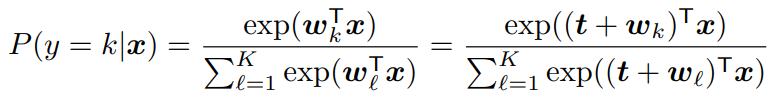

Persamaan likelihood softmax regression:

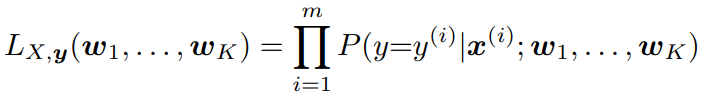

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [354]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 7, 5, 7])
x2  = np.array([3, 6, 2, 3, 5, 6, 3, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
# [0, 1, 0, 2, 2, 1, 0, 2, 2, 2]
y_softmax_train   = np.array([2, 0, 2, 1, 1, 0, 2, 1, 1, 1])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3]
 [3 6]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 3]
 [7 4]
 [5 3]
 [7 6]]
y:  [2 0 2 1 1 0 2 1 1 1]


In [355]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [356]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([2, 1])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[2 1]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [357]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[-2.73396481 -1.90863029  4.6425951 ] [[-0.30513117  0.83682801]
 [ 0.99982232 -0.21460023]
 [-0.69469115 -0.62222778]]


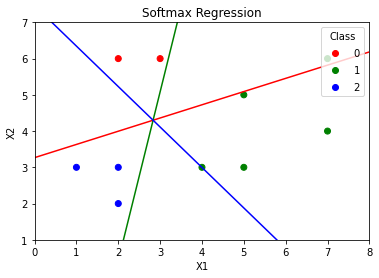

In [358]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

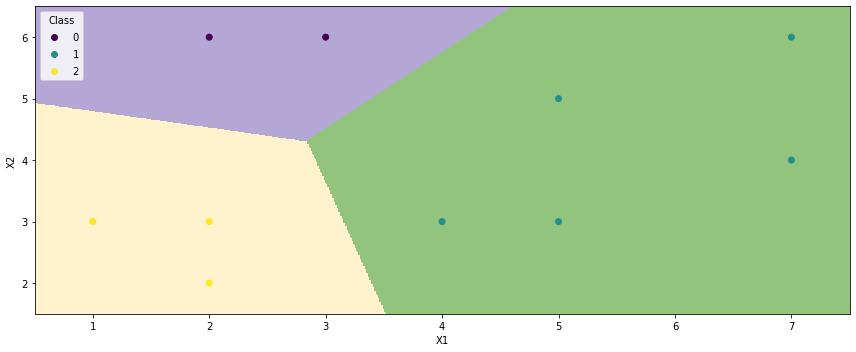

In [359]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model berhasil memprediksi benar pada semua (2 buah) data uji. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [360]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


### Penjelasan Dataset untuk *Softmax Regression*

<img src="https://cdn.mos.cms.futurecdn.net/LZUsfgcXH7WMeVvuHYsoSA-1200-80.png" alt="Stars" width=300/>

Dataset yang digunakan pada bagian softmax regression adalah data terkait klasifikasi jenis bintang. Berikut penjelasan masing-masing kolom pada data.

- **Temperature**: Suhu bintang dalam Kelvin.

- **L (Lo)**: Luminositas relatif atau radiasi foton matahari yang dikeluarkan oleh bintang.

- **R (Ro)**: Jari-jari bintang relatif terhadap matahari.

- **Absolute Magnitude (A_M)**: Magnitudo kecerahan yang tampak pada sebuah bintang.

- **Color**: Warna bintang secara umum.

- **Spectral_Class**: Tipe spectral asteroid SMASS (O,B,A,F,G,K,M), [lebih lanjut](https://en.wikipedia.org/wiki/Asteroid_spectral_types)

- **Class**: Jenis Bintang, (0 = Red Dwarf, 1 = Brown Dwarf, 2 = White Dwarf, 3 = Main Sequence, 4 = Super Giants, 5 = Hyper Giants)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/brsdincer/star-type-classification


In [361]:
import pandas as pd

# Import dataset stars dan menampilkan 5 row teratas
df_stars = pd.read_csv('stars.csv')

df_stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [362]:
df_stars.Type.unique()
#ada 5 angka -> dan ini dianggap int64, sebenarnya aman juga kalau dijadiin kategorikal, since dia ga bakal kenak hitung juga 
#atau biarin jadi int64 tapi nanti jangan samapi kenak operasi perhitungan seperti scale

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [363]:
# Menampilkan informasi keseluruhan terkait dataset
df_stars.info()
#disini ada type yang bsia 0 ,1,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


#### Soal 6: Softmax Regression

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing. Gunakan `random_state=12` untuk splitting data.

In [364]:
#pisah fitur type dan assign ke X dan y 
X = df_stars.drop(columns=['Type'])  
y = df_stars['Type'] 
#bagi train dan test jadi 80% 20% dengan random state 12 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [365]:
# y_test

In [366]:
# X_train

b) Lakukan encoding pada fitur kategorikal. Hint: latih encoder pada data training terlebih dahulu, baru diterapkan pada data testing.

In [367]:
df_stars.Color.unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [368]:
df_stars.Spectral_Class.unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [369]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Tentukan kolom yang ingin diencode
columns_to_encode = [4, 5]  # Index kolom Spectral_Class dan Color

# Buat transformer
transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(sparse=False, handle_unknown='ignore'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Fit dan transformasi X_train
X_train_encoded = transformer.fit_transform(X_train)

# Transformasi X_test
X_test_encoded = transformer.transform(X_test)

# Ambil nama kolom untuk kolom yang diencode
encoded_columns = transformer.named_transformers_['onehot'].get_feature_names_out(input_features=X_train.columns[columns_to_encode])

# Gabungkan hasil encoding dengan kolom yang tidak diencode
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=list(encoded_columns) + list(X_train.columns.drop(X_train.columns[columns_to_encode])))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=list(encoded_columns) + list(X_test.columns.drop(X_test.columns[columns_to_encode])))


c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [370]:
# X_train

In [371]:
# X_test

In [372]:
X_train_encoded_df

,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,Color_White,...,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Temperature,L,R,A_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2799.0,0.00180,0.1600,14.790
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9892.0,593900.00000,80.0000,-7.262
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6757.0,1.43000,1.1200,2.410
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3042.0,0.00050,0.1542,16.600
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3142.0,0.00132,0.2580,14.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2800.0,0.00020,0.1600,16.650
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3095.0,0.00019,0.4920,10.870
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3542.0,0.00090,0.6200,14.230
190,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,28700.0,16790.00000,6.4000,-4.090


In [373]:
X_train_encoded_df

,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,Color_White,...,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Temperature,L,R,A_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2799.0,0.00180,0.1600,14.790
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9892.0,593900.00000,80.0000,-7.262
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,6757.0,1.43000,1.1200,2.410
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3042.0,0.00050,0.1542,16.600
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3142.0,0.00132,0.2580,14.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2800.0,0.00020,0.1600,16.650
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3095.0,0.00019,0.4920,10.870
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3542.0,0.00090,0.6200,14.230
190,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,28700.0,16790.00000,6.4000,-4.090


In [374]:
X_train_encoded_df.columns

Index(['Color_Blue', 'Color_Blue White', 'Color_Blue white',
       'Color_Blue-White', 'Color_Blue-white', 'Color_Orange',
       'Color_Orange-Red', 'Color_Pale yellow orange', 'Color_Red',
       'Color_White', 'Color_White-Yellow', 'Color_Whitish', 'Color_Yellowish',
       'Color_Yellowish White', 'Color_white', 'Color_yellow-white',
       'Color_yellowish', 'Spectral_Class_A', 'Spectral_Class_B',
       'Spectral_Class_F', 'Spectral_Class_G', 'Spectral_Class_K',
       'Spectral_Class_M', 'Spectral_Class_O', 'Temperature', 'L', 'R', 'A_M'],
      dtype='object')

In [375]:
# y_test

In [376]:
# #Nitip contoh kalau pakai pipeline 
# # Preprocessing untuk fitur kategorikal (Color dan Spectral_Class)
# categorical_cols = ['Color', 'Spectral_Class']
# # Preprocessing untuk fitur numerikal (kolom selain kategorikal)
# numeric_cols = [col for col in X_train.columns if col not in categorical_cols]

# # Preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_cols),  # Normalisasi untuk fitur numerikal
#         ('cat', OneHotEncoder(), categorical_cols)  # Encoding untuk fitur kategorikal
#     ])

# # Model softmax regression
# softmax_reg_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000))  # Softmax regression
# ])

# # Latih model softmax regression menggunakan data training
# softmax_reg_model.fit(X_train, y_train)

c) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [377]:

from sklearn.preprocessing import StandardScaler
columns_numerical = ['Temperature', 'L', 'R', 'A_M']

scaler = StandardScaler()
scaler.fit(X_train_encoded_df[columns_numerical])
X_train_normalized = X_train_encoded_df.copy()  
X_train_normalized[columns_numerical] = scaler.transform(X_train_encoded_df[columns_numerical])

X_test_normalized = X_test_encoded_df.copy()  
X_test_normalized[columns_numerical] = scaler.transform(X_test_encoded_df[columns_numerical])


In [378]:

X_test_normalized 

,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,Color_White,...,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Temperature,L,R,A_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.784345,-0.603884,-0.435349,1.212996
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.192184,-0.603884,-0.435512,0.750223
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.702391,0.120633,1.774291,-1.447712
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.082558,-0.603884,-0.435513,0.660159
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.058445,1.551437,2.230410,-1.363397
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.732405,-0.603884,-0.435351,1.232159
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2.106927,-0.438050,-0.423144,-0.814392
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.180477,-0.603884,-0.435512,0.678364
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.245240,3.700031,1.786087,-1.146861
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.718888,0.908400,2.216648,-1.537775


In [379]:
X_train_normalized

,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,Color_Orange-Red,Color_Pale yellow orange,Color_Red,Color_White,...,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Temperature,L,R,A_M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.788177,-0.603884,-0.435215,1.005084
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.033242,2.811118,-0.278247,-1.107770
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.366912,-0.603875,-0.433328,-0.181073
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.762313,-0.603884,-0.435227,1.178504
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.751670,-0.603884,-0.435023,0.940889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.788070,-0.603884,-0.435215,1.183295
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.756672,-0.603884,-0.434563,0.629499
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.709096,-0.603884,-0.434311,0.951429
190,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.968564,-0.507339,-0.422947,-0.803853


d) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan nilai intercept dan parameter $w_0, w_1$, dst. untuk setiap kelas output yang telah dilatih

In [380]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model softmax regression
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#fit softmax model
softmax_reg.fit(X_train_normalized, y_train)
# Tampilkan nilai intercept dan parameter untuk setiap kelas output
print("Intercept (b0):", softmax_reg.intercept_)
print("Parameters (w):", softmax_reg.coef_)


Intercept (b0): [-2.82074327 -0.37602195  0.67964961  1.68230028  0.59242041  0.24239492]
Parameters (w): [[-7.14697161e-02 -3.06120241e-02 -8.12550699e-02 -3.04319522e-04
  -1.14028751e-03  3.64442778e-07 -4.19616924e-03 -5.54793143e-02
   6.11229316e-01 -1.26546908e-01 -5.66129649e-02 -1.35160666e-03
  -4.47523733e-03 -7.42477294e-02 -7.23199099e-02 -1.29946267e-02
  -1.77363199e-02 -1.80786700e-01 -1.22954782e-01 -2.80550884e-01
   8.46137417e-07 -2.64069853e-02  6.11228093e-01 -4.21109708e-05
  -6.81422212e-01 -7.28529739e-04 -4.86323814e-03  3.68472343e+00]
 [-1.29288967e-01 -3.28073005e-02 -4.12087726e-02 -3.88872517e-02
  -1.71539013e-01 -4.33103896e-06 -6.49584133e-02 -2.38526242e-02
   1.19380419e+00 -5.77081795e-02 -2.42215885e-02 -9.59555220e-02
  -6.63006906e-02 -4.22417306e-02 -4.19020010e-02 -2.33483526e-01
  -1.29460760e-01 -2.61830202e-01 -2.45014530e-01 -3.75532289e-01
  -3.29194314e-04 -2.60832578e-01  1.19424177e+00 -5.07194543e-02
  -5.68515223e-01 -1.00836442e+00 -

e) Tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [381]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Prediksi kelas pada testing set
y_pred = softmax_reg.predict(X_test_normalized)

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Hitung hasil evaluasi metrik
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')

# Tampilkan hasil evaluasi metrik
print("\nF1 Macro Average:", f1_macro)
print("F1 Micro Average:", f1_micro)
print("Precision Macro Average:", precision_macro)
print("Precision Micro Average:", precision_micro)
print("Recall Macro Average:", recall_macro)
print("Recall Micro Average:", recall_micro)


Confusion Matrix:
[[ 6  0  0  0  0  0]
 [ 0  8  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  0  0  0 11]]

F1 Macro Average: 1.0
F1 Micro Average: 1.0
Precision Macro Average: 1.0
Precision Micro Average: 1.0
Recall Macro Average: 1.0
Recall Micro Average: 1.0


f) Dari persamaan model yang telah dibuat, jelaskan bagaimana pengaruh fitur `A_M` terhadap likelihood prediksi kelas.

Hint: Anda dapat menganalisis dari nilai bobot yang ditampilkan pada soal d). Tambahkan cell code jika perlu.

In [382]:
# ambil kolom A_M dari train  
index_A_M = X_train_encoded_df.columns.get_loc('A_M')
# tampilin bobot untuk fitur A_M
print("Bobot untuk fitur A_M:", softmax_reg.coef_[:, index_A_M])
#ini bobot utuk tiap kelas prediksi kah? ya

Bobot untuk fitur A_M: [ 3.68472343 -0.57536424  1.68904548 -1.47126677 -2.2060339  -1.12110401]


In [383]:
y_train.unique()

array([1, 4, 3, 0, 5, 2], dtype=int64)

In [384]:
#cek urutan kelas dari model
kelas_urutan = softmax_reg.classes_
print("Urutan kelas:", kelas_urutan)

Urutan kelas: [0 1 2 3 4 5]


Penjelasan dari bobot:
- Bobot pertama untuk kelas pertama, yakni Type 0 (3.68472343) : bobotnya positif dan besar, ini menunjukkan bahwa meningkatkan nilai A_M secara signifikan akan meningkatkan likelihood dari prediksi kelas 0 atau fitur ini memiliki pengaruh yang kuat dalam terhadap keputusan model untuk memprediksi suatu data point masuk ke dalam kelas pertama. Jadi jika nilai fitur A_M tinggi maka cenderung menyebabkan model lebih cenderung untuk memprediksi bahwa data point tersebut masuk ke dalam kelas Type 0.
- Bobot kedua untuk kelas kedua, yakni Type 1  (-0.57536424): bobotnya negatif, menunjukkan bahwa meningkatkan nilai A_M akan sedikit menurunkan likelihood prediksi kelas kedua (kelas 1). Walaupun pengaruhnya tidak besar, seperti bobot pertama, tetapi fitur A_M akan memiliki kecenderungan untuk menurunkan prediksi kelas kedua. Ini berarti semakin tinggi nilai A M maka semakin rendah kemungkinan data point tersebut akan diklasifikasikan ke dalam kelas kedua.
- Bobot ketiga untuk kelas ketiga, yakni Type 2 (1.68904548): bobot positif menunjukkan bahwa meningkatkan nilai A_M akan meningkatkan likelihood prediksi utn kelas ketiga.
- Bobot keempat untuk kelas keempat, yakni Type 3 (-1.47126677) : bobot negatif menunjukkan bahwa meningkatkan nilai A_M akan menurunkan likelihood prediksi kelas keempat.
- Bobot kelima untuk kelas kelima, yakni Type 4 (-2.2060339): bobot negatif dan besar ini menunjukkan bahwa meningkatkan nilai A_M akan secara drastis menurunkan likelihood prediksi suatu data point ke Type 4. Fitur A_M memiliki pengaruh yang sangat kuat untuk menurunkan prediksi kelas kelima.
- Bobot keenam untuk kelas keenam yakni Type 5  (-1.12110401): bobot negatif menunjukkan meningkatkan nilai A_M yang akan menurunkan likelihood prediksi kelas keenam. Fitur ini memiliki dampak negatif dalam memprediksi kelas keenam, tetapi dampaknya tidak sebesar pada kelas kelima atau Type 4 , Type 1, dan Type 3.


`JAWABAN`

## Kompetisi Kaggle Regresi Berdasarkan Linear Models [10 Poin]

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi. Anda dapat mengunduh dataset yang digunakan dari halaman kompetisi tersebut.
*   Kerjakan solusi Anda menggunakan notebook ini. Anda dibebaskan untuk menambahkan cell code dan markdown sesuai kebutuhan.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/eb875d3751f34371b00c1f19fa7381e2)

Load Dataset

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split, KFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor, BayesianRidge, HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import missingno as msno


In [386]:
train = pd.read_csv('life_expectancy_train.csv')
test = pd.read_csv('life_expectancy_test.csv')

Lihat Data 

In [387]:
train.head()

,Id,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,272007,Cabo Verde,2007,Developing,72.3,126.0,0,5.28,345.463714,96.0,...,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9
1,272001,Cabo Verde,2001,Developing,73.0,152.0,0,3.81,150.743486,NaN,...,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0
2,1432011,Saint Lucia,2011,Developing,74.6,143.0,0,10.43,0.000000,99.0,...,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9
3,1752013,Tunisia,2013,Developing,74.9,13.0,3,1.29,594.645310,98.0,...,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7
4,232002,Brunei Darussalam,2002,Developing,74.8,95.0,0,0.13,941.703687,99.0,...,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3


In [388]:
test.head()

,Id,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1672006,Syrian Arab Republic,2006,Developing,123.0,8,0.97,122.652333,83.0,517,...,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
1,402006,Croatia,2006,Developed,113.0,0,11.83,1555.651986,NaN,1,...,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
2,1122007,Montenegro,2007,Developing,125.0,0,4.98,678.518894,9.0,0,...,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
3,112014,Bahrain,2014,Developing,7.0,0,1.57,367.255674,98.0,46,...,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,6.0,0.820,14.5
4,872000,Kenya,2000,Developing,428.0,77,1.51,0.681686,NaN,21002,...,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4


Make sure tidak ada spasi tambahan di belakang tiap fitur agar tidak menggangu proses fitur encode dan lain-lain

In [389]:
train = train.rename(columns=lambda x: x.strip())
test = test.rename(columns=lambda x: x.strip())

Cek Tipe Data

In [390]:
train.info()
#keliatannya sudah sesuai semua

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id                               2350 non-null   int64  
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Life expectancy                  2342 non-null   float64
 5   Adult Mortality                  2342 non-null   float64
 6   infant deaths                    2350 non-null   int64  
 7   Alcohol                          2192 non-null   float64
 8   percentage expenditure           2350 non-null   float64
 9   Hepatitis B                      1911 non-null   float64
 10  Measles                          2350 non-null   int64  
 11  BMI                              2323 non-null   float64
 12  under-five deaths   

In [391]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Id                               586 non-null    int64  
 1   Country                          586 non-null    object 
 2   Year                             586 non-null    int64  
 3   Status                           586 non-null    object 
 4   Adult Mortality                  586 non-null    float64
 5   infant deaths                    586 non-null    int64  
 6   Alcohol                          550 non-null    float64
 7   percentage expenditure           586 non-null    float64
 8   Hepatitis B                      472 non-null    float64
 9   Measles                          586 non-null    int64  
 10  BMI                              580 non-null    float64
 11  under-five deaths                586 non-null    int64  
 12  Polio                 

Cek Missing Values

In [392]:
# persentase missing values
(train.isna().sum()/ len(train) * 100).sort_values(ascending=False)


Population                         21.957447
Hepatitis B                        18.680851
GDP                                14.680851
Total expenditure                   7.872340
Alcohol                             6.723404
Income composition of resources     5.574468
Schooling                           5.489362
thinness 5-9 years                  1.148936
thinness  1-19 years                1.148936
BMI                                 1.148936
Polio                               0.595745
Diphtheria                          0.595745
Adult Mortality                     0.340426
Life expectancy                     0.340426
Measles                             0.000000
Country                             0.000000
under-five deaths                   0.000000
percentage expenditure              0.000000
HIV/AIDS                            0.000000
infant deaths                       0.000000
Status                              0.000000
Year                                0.000000
Id        

In [393]:
#cek misisng values yang ada di test
(test.isna().sum()/ len(test) * 100).sort_values(ascending=False)


Population                         23.037543
Hepatitis B                        19.453925
GDP                                17.406143
Total expenditure                   6.996587
Alcohol                             6.143345
Schooling                           5.802048
Income composition of resources     5.802048
thinness 5-9 years                  1.023891
thinness  1-19 years                1.023891
BMI                                 1.023891
Diphtheria                          0.853242
Polio                               0.853242
HIV/AIDS                            0.000000
Id                                  0.000000
Country                             0.000000
Measles                             0.000000
percentage expenditure              0.000000
infant deaths                       0.000000
Adult Mortality                     0.000000
Status                              0.000000
Year                                0.000000
under-five deaths                   0.000000
dtype: flo

In [394]:
#ada misisng value juga ditest
#isi dengan distirbusi yang ada di train(?)
#cek distribusi dulu untuk semua kolom numerik
# train.hist()
train.skew()

C:\Users\ACER\AppData\Local\Temp\ipykernel_2684\2740932145.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


Id                                  0.019034
Year                               -0.011046
Life expectancy                    -0.660739
Adult Mortality                     1.216304
infant deaths                       9.925277
Alcohol                             0.595402
percentage expenditure              4.749119
Hepatitis B                        -1.954565
Measles                            10.026217
BMI                                -0.235955
under-five deaths                   9.596752
Polio                              -2.107654
Total expenditure                   0.626763
Diphtheria                         -2.080900
HIV/AIDS                            5.356099
GDP                                 3.238625
Population                         17.408459
thinness  1-19 years                1.715887
thinness 5-9 years                  1.769484
Income composition of resources    -1.148457
Schooling                          -0.589092
dtype: float64

In [395]:
# test.hist()
test.skew()

C:\Users\ACER\AppData\Local\Temp\ipykernel_2684\3969666468.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.skew()


Id                                  0.093553
Year                                0.018687
Adult Mortality                     0.978882
infant deaths                       9.066794
Alcohol                             0.563759
percentage expenditure              4.311851
Hepatitis B                        -1.861243
Measles                             6.683539
BMI                                -0.161763
under-five deaths                   8.910242
Polio                              -2.083092
Total expenditure                   0.484124
Diphtheria                         -2.060235
HIV/AIDS                            5.244972
GDP                                 3.087578
Population                         12.295204
thinness  1-19 years                1.698755
thinness 5-9 years                  1.807852
Income composition of resources    -1.106941
Schooling                          -0.611481
dtype: float64

In [396]:
#Handle misisng di train didrop aja baris yang mengandung nan valuenya sekalian dengan
#drop id 
#drop missing value yang ada di life expectacny
train = train.dropna(subset=['Life expectancy'])
train = train.drop(columns=['Id'])


In [397]:
#karena pada skew jadi nan valuenya di impute dengan median saja
train.fillna(train.median(), inplace=True)

#kalau test diiMputenya denagn median juga tetapi dengan nilai dari train punya median
cols = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
median_values = train[cols].median()
test[cols] = test[cols].fillna(median_values)

C:\Users\ACER\AppData\Local\Temp\ipykernel_2684\3980085369.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.median(), inplace=True)


Korelasi


In [398]:

correlation_matrix = train.corr()
correlation_with_life_expectancy = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(correlation_with_life_expectancy)


Life expectancy                    1.000000
Schooling                          0.709784
Income composition of resources    0.692060
BMI                                0.555445
Diphtheria                         0.457554
Polio                              0.445913
GDP                                0.421644
Alcohol                            0.381386
percentage expenditure             0.374437
Total expenditure                  0.194152
Year                               0.174669
Hepatitis B                        0.153899
Population                        -0.024028
Measles                           -0.164829
infant deaths                     -0.202667
under-five deaths                 -0.228497
thinness 5-9 years                -0.465214
thinness  1-19 years              -0.465465
HIV/AIDS                          -0.557928
Adult Mortality                   -0.702679
Name: Life expectancy, dtype: float64


In [399]:
correlation_matrix = train.corr()


In [400]:
threshold = 0.8
#cari pasangan fitur yang diatas threshold 
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Menampilkan pasangan fitur yang memiliki korelasi di atas ambang
print("Pasangan fitur dengan korelasi di atas ambang {}:".format(threshold))
for pair in high_correlation_pairs:
    print(pair)


Pasangan fitur dengan korelasi di atas ambang 0.8:
('infant deaths', 'under-five deaths', 0.996284420159543)
('percentage expenditure', 'GDP', 0.8950495223392283)
('thinness  1-19 years', 'thinness 5-9 years', 0.9364715760805016)
('Income composition of resources', 'Schooling', 0.8062667657307103)


In [401]:
#based dari korelasi nya manayang lebih kuat ke lie expectacy berarti drop
#infant deaths
#percentage expenditure
#thinness 5-9 years
#Income composition of resources
features_to_drop = ['infant deaths', 'percentage expenditure', 'thinness 5-9 years', 'Income composition of resources']
train.drop(features_to_drop, axis=1, inplace=True)
test.drop(features_to_drop, axis=1, inplace=True)


Encode

In [402]:
#encode status dulu 
train = pd.get_dummies(train, columns=['Status'], dtype='int64', drop_first=True)


In [403]:
test = pd.get_dummies(test, columns=['Status'], dtype='int64', drop_first=True)


In [404]:
#dapt niali unik 
train_countries = set(train['Country'].unique())
test_countries = set(test['Country'].unique())

# krn ada beberapa neagra yang ebrbeda antara traind an test -> search intersection dulu 
similar_countries = train_countries.intersection(test_countries)

# One-hot encode similar countries and label others as 'Others'

def encode_country(country):
    if country in similar_countries:
        return country
    else:
        return 'Others'

train['Country_encoded'] = train['Country'].apply(encode_country)
test['Country_encoded'] = test['Country'].apply(encode_country)

#pakek dumies buat one hot encoding 
train_encoded = pd.get_dummies(train['Country_encoded'], prefix='Country', dtype='int64')
test_encoded = pd.get_dummies(test['Country_encoded'], prefix='Country', dtype='int64')

# concat dulu train sm train-encoed sebelumnya 
train = pd.concat([train, train_encoded], axis=1)
test = pd.concat([test, test_encoded], axis=1)


In [405]:
#drop dulu setelha yang countyr dan country_encoded itu 
train.drop(['Country', 'Country_encoded'], axis=1, inplace=True)
test.drop(['Country', 'Country_encoded'], axis=1, inplace=True)

In [406]:
#masih ada kolm country othersnya 
train.Country_Others

0       0
1       0
2       0
3       0
4       0
       ..
2345    0
2346    0
2347    0
2348    0
2349    0
Name: Country_Others, Length: 2342, dtype: int64

In [407]:
train.drop('Country_Others', inplace=True, axis=1)

Buat cross validation 

In [408]:
def cross_validation(model_name, model, X, y, fold_indices):
    r2_scores = []

    for train_indices, test_indices in fold_indices:
        X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
        X_val, y_val = X.iloc[test_indices], y.iloc[test_indices]

        #fit moel
        model.fit(X_train, y_train)

        # predict 
        y_pred = model.predict(X_val)
        fold_r2 = r2_score(y_val, y_pred)
        r2_scores.append(fold_r2)

    mean_r2 = np.mean(r2_scores)

    # Print the results
    print(model_name.upper())
    print(f"Mean R2 Score: {mean_r2}")

In [ ]:
Buat model
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
    "SGD Regression": SGDRegressor(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Huber Regression": HuberRegressor()
}

Buat yang fold 

In [409]:
#sekarang lakuin dulu cross validaitons dengan fold
from sklearn.metrics import r2_score
import numpy as np

def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds



# lapha 
X = train.drop('Life expectancy', axis=1)
y = train['Life expectancy']
alpha_ls = [0.0005, 0.005, 0.01, 0.1, 1, 5, 50]

# cek smeua lienar model


k = 5
fold_indices = kfold_indices(train, k)

# untuk utnk tiap model
for model_name, model in models.items():
    for alpha in alpha_ls:
        #ini yg memang pakai alpha
        if model_name in ["Lasso Regression", "Ridge Regression", "ElasticNet Regression"]:
            model.set_params(alpha=alpha)
        print(f"{model_name} with ALPHA = {alpha}")
        cross_validation(model_name, model, X, y, fold_indices)
        print("")


Linear Regression with ALPHA = 0.0005
LINEAR REGRESSION
Mean R2 Score: 0.9428543018923932

Linear Regression with ALPHA = 0.005
LINEAR REGRESSION
Mean R2 Score: 0.9428543018923932

Linear Regression with ALPHA = 0.01
LINEAR REGRESSION
Mean R2 Score: 0.9428543018923932

Linear Regression with ALPHA = 0.1
LINEAR REGRESSION
Mean R2 Score: 0.9428543018923932

Linear Regression with ALPHA = 1
LINEAR REGRESSION
Mean R2 Score: 0.9428543018923932

Linear Regression with ALPHA = 5
LINEAR REGRESSION
Mean R2 Score: 0.9428543018923932

Linear Regression with ALPHA = 50
LINEAR REGRESSION
Mean R2 Score: 0.9428543018923932

Lasso Regression with ALPHA = 0.0005
LASSO REGRESSION
Mean R2 Score: 0.9422129782777524

Lasso Regression with ALPHA = 0.005
LASSO REGRESSION
Mean R2 Score: 0.916150573425627

Lasso Regression with ALPHA = 0.01
LASSO REGRESSION
Mean R2 Score: 0.8850638547045342

Lasso Regression with ALPHA = 0.1
LASSO REGRESSION
Mean R2 Score: 0.7949419638496326

Lasso Regression with ALPHA = 1
LA

c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.27273e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.09987e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.71728e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.84659e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.05938e-20)

RIDGE REGRESSION
Mean R2 Score: 0.942856735198567

Ridge Regression with ALPHA = 0.005


c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.90791e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.10505e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.40863e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.21701e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RIDGE REGRESSION
Mean R2 Score: 0.9428758096139915

Ridge Regression with ALPHA = 0.01


c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.80703e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.97643e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.15579e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.73488e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.3545e-20):

RIDGE REGRESSION
Mean R2 Score: 0.9428914048250583

Ridge Regression with ALPHA = 0.1


c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.68088e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.22673e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.07894e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.36051e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RIDGE REGRESSION
Mean R2 Score: 0.9425621817567205

Ridge Regression with ALPHA = 1


c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.24114e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.39475e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.38819e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.00318e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.33572e-19)

RIDGE REGRESSION
Mean R2 Score: 0.9323825902409049

Ridge Regression with ALPHA = 5


c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.92062e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.27562e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.12758e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.38148e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RIDGE REGRESSION
Mean R2 Score: 0.9016013204126552

Ridge Regression with ALPHA = 50


c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.66085e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.13383e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.54369e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.41714e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.58315e-18)

RIDGE REGRESSION
Mean R2 Score: 0.8262396323949284

ElasticNet Regression with ALPHA = 0.0005
ELASTICNET REGRESSION
Mean R2 Score: 0.9373435912107848

ElasticNet Regression with ALPHA = 0.005
ELASTICNET REGRESSION
Mean R2 Score: 0.8933455932682097

ElasticNet Regression with ALPHA = 0.01
ELASTICNET REGRESSION
Mean R2 Score: 0.8636999024243586

ElasticNet Regression with ALPHA = 0.1
ELASTICNET REGRESSION
Mean R2 Score: 0.7959730171127253

ElasticNet Regression with ALPHA = 1
ELASTICNET REGRESSION
Mean R2 Score: 0.7917933195560665

ElasticNet Regression with ALPHA = 5
ELASTICNET REGRESSION
Mean R2 Score: 0.7646336675493769

ElasticNet Regression with ALPHA = 50
ELASTICNET REGRESSION
Mean R2 Score: 0.6384108083897932

SGD Regression with ALPHA = 0.0005
SGD REGRESSION
Mean R2 Score: -8.538158778459027e+46

SGD Regression with ALPHA = 0.005
SGD REGRESSION
Mean R2 Score: -4.937515748621545e+48

SGD Regression with ALPHA = 0.01
SGD REGRESSION
Mean R2 Score: -7.859394855255072e+47

SGD Regress

models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
    "SGD Regression": SGDRegressor(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Huber Regression": HuberRegressor()
}

In [410]:
model = Ridge(alpha=0.01)
model.fit(X, y)

c:\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.33065e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.01)

In [411]:
submission = {
    'Id': test['Id'],
    'Life Expectancy': model.predict(test.drop('Id', axis=1))
}

submission = pd.DataFrame(submission)

In [412]:
submission

,Id,Life Expectancy
0,1672006,70.376160
1,402006,75.744601
2,1122007,74.778873
3,112014,77.709843
4,872000,50.603288
...,...,...
581,552006,60.134291
582,892004,73.077427
583,622015,61.541133
584,1742006,70.561020


In [413]:
# submission.to_csv('submissionv_2.csv', index=False)